## 1. 문제 정의

해양 생태계는 심각한 위기에 직면해 있다. 최근 보고서에 따르면, 해양 생물종의 88%가 플라스틱 쓰레기로 인해 부정적 영향을 받고 있으며, 일부 지역은 회복이 불가능한 정도로 오염되어 있다. 이러한 해양 오염은 인류의 생존 위기와도 연결되어 있다. 국제사회와 각국은 해양 쓰레기로부터 환경 및 생태적 위협을 차단하기 위해 다양한 연대와 협력 체계를 구축하고 있다. 하지만, 시민사회, 기업, 연구기관 등 모든 이들의 노력이 필요하다. 우리는 이제 플라스틱 사용을 줄이고, 대체 제품 개발, 첨단장비 활용 등을 통해 해양 쓰레기 문제를 해결해야 한다. 이는 미래 세대에게 건강한 바다를 물려주는 현 세대의 책무이다.

출처: https://www.hani.co.kr/arti/opinion/because/1054813.html

## 2. 데이터 수집 및 전처리

(1) 데이터 수집(출판사 제공 깃허브 또는 구글 드라이브)

In [ ]:
# 출판사 제공 깃허브 클론
!git clone https://github.com/2022infotextbook/ai-basic.git

Cloning into 'ai_project'...
remote: Enumerating objects: 337, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 337 (delta 0), reused 3 (delta 0), pack-reused 334
Receiving objects: 100% (337/337), 251.19 MiB | 36.15 MiB/s, done.
Updating files: 100% (401/401), done.


In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from skimage import io

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# 이미지 불러오기
def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img = io.imread(os.path.join(folder_path, filename))
            if img is not None:
                images.append(img)
    return images

# Google Drive에 있는 img 폴더 경로
not_trash_folder = '/content/ai-basic/4_ai_project/2_img/not_trash'
trash_folder = '/content/ai-basic/4_ai_project/2_img/trash'

# 이미지 데이터 불러오기
not_trash_images = load_images(not_trash_folder)
trash_images = load_images(trash_folder)

print(f'해양생물 이미지 개수: {len(not_trash_images)}')
print(f'해양쓰레기 이미지 개수: {len(trash_images)}')

해양생물 이미지 개수: 200
해양쓰레기 이미지 개수: 200


(2) 데이터 전처리

In [ ]:
# 이미지 크기 조정
import cv2
from skimage.transform import resize

# 이미지 크기 조정
def resize_images(images, width=128, height=128):
    resized_images = [cv2.resize(img, (width, height)) for img in images]
    return resized_images

not_trash_images = resize_images(not_trash_images)
trash_images = resize_images(trash_images)

증강후 해양생물 이미지 개수: 400
증강후 해양쓰레기 이미지 개수: 400


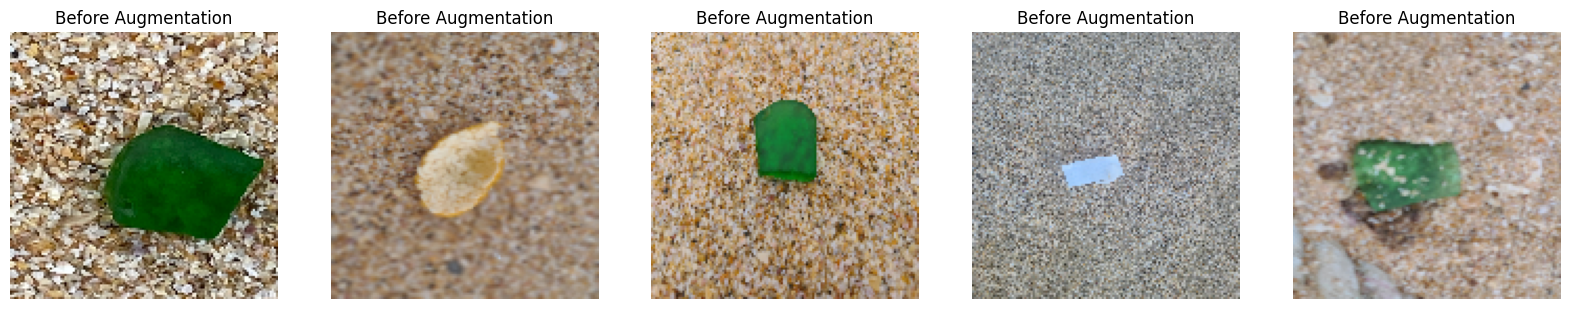

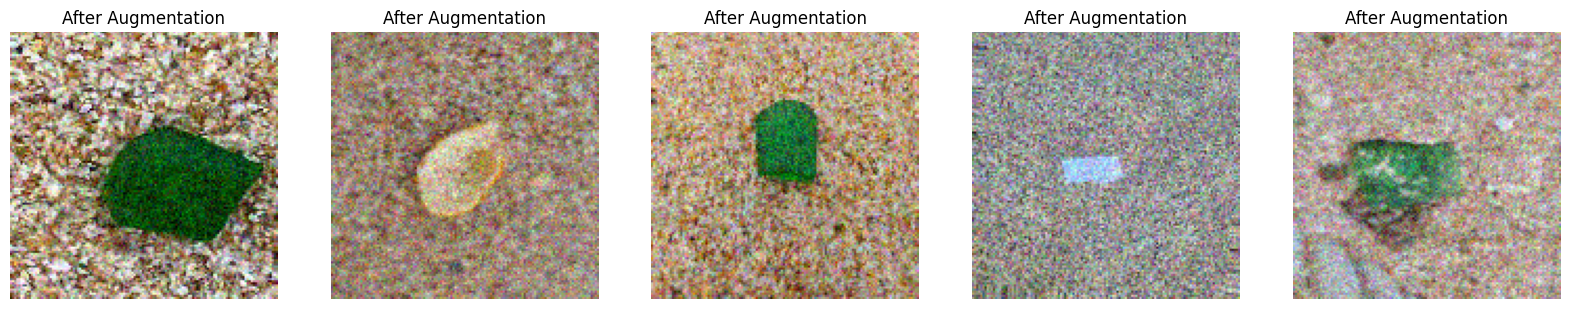

In [ ]:
from skimage.util import random_noise
from skimage.transform import rotate

import matplotlib.pyplot as plt
import numpy as np

# 데이터 증강 (회전, 노이즈 추가)
def augment_data(images, degree=10):
    augmented_images = []
    for image in images:
        angle=np.random.uniform(-degree, degree)
        rotated_image = rotate(image, angle, mode='edge')
        noisy_image = random_noise(rotated_image)
        augmented_images.append(noisy_image)
    return augmented_images

def plot_images(images, title):
    fig, axs = plt.subplots(1, len(images), figsize=(20, 20))
    for i, img in enumerate(images):
        axs[i].imshow(img)
        axs[i].set_title(title)
        axs[i].axis('off')

# 데이터 증강 전 이미지 표시
sample_images = trash_images[:5]
plot_images(sample_images, 'Before Augmentation')

# 데이터 증강 수행
augmented_images = augment_data(sample_images)

# 데이터 증강 후 이미지 표시
plot_images(augmented_images, 'After Augmentation')

# 전체 데이터 증강
not_trash_images += augment_data(not_trash_images)
trash_images += augment_data(trash_images)

print(f'증강후 해양생물 이미지 개수: {len(not_trash_images)}')
print(f'증강후 해양쓰레기 이미지 개수: {len(trash_images)}')


정규화 전:


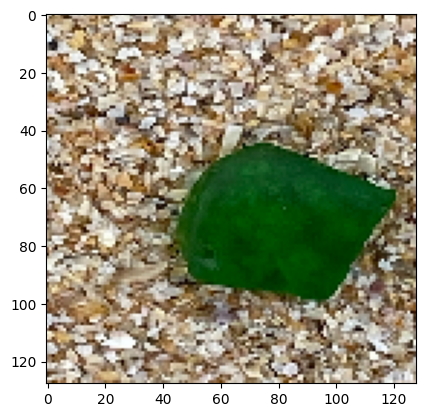

정규화 전 데이터 일부:
[[222 218 204]
 [253 248 234]
 [ 65  49  17]
 [222 202 170]
 [186 166 136]]
정규화 후:


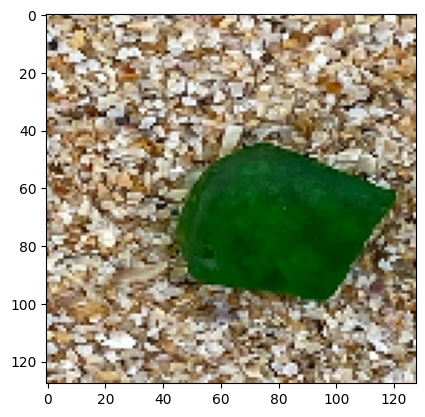

정규화 후 데이터 일부:
[[0.87058824 0.85490197 0.8       ]
 [0.99215686 0.972549   0.91764706]
 [0.25490198 0.19215687 0.06666667]
 [0.87058824 0.7921569  0.6666667 ]
 [0.7294118  0.6509804  0.53333336]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_images(images):
    return np.array(images).astype('float32') / 255.0

# 정규화 전 이미지 출력
print("정규화 전:")
plt.imshow(trash_images[0])
plt.show()
print("정규화 전 데이터 일부:")
print(trash_images[0][0, :5])  # 이미지의 첫 행의 첫 5개 픽셀 값 출력

# 정규화
not_trash_images = normalize_images(not_trash_images)
trash_images = normalize_images(trash_images)

# 정규화 후 이미지 출력
print("정규화 후:")
plt.imshow(trash_images[0])
plt.show()
print("정규화 후 데이터 일부:")
print(trash_images[0][0, :5])  # 이미지의 첫 행의 첫 5개 픽셀 값 출력


In [ ]:
# 레이블링
import numpy as np

not_trash_labels = [1] * len(not_trash_images)
trash_labels = [0] * len(trash_images)

# 데이터와 레이블 병합
all_images = np.concatenate(
    (not_trash_images, trash_images), axis=0)
all_labels = np.array(not_trash_labels + trash_labels)

In [ ]:
# 학습용, 테스트용 데이터셋 분할 (80% 학습용, 20% 테스트용)
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.2, stratify=all_labels, random_state=42)

print(f'학습용 이미지 개수: {len(train_images)}')
print(f'테스트용 이미지 개수: {len(test_images)}')

학습용 이미지 개수: 640
테스트용 이미지 개수: 160


## 3. 기계학습 유형과 알고리즘 선정

■ 기계학습 유형

해양쓰레기 탐지 프로젝트는 이미지 분류 문제이므로 지도학습의 분류 문제로 해결할 수 있다.

 ■ 알고리즘 선정

합성곱 신경망(Convolution Neural Network, CNN)이 이미지 분류 모델에 성능이 뛰어나므로 CNN 모델을 선정한다.

## 4. 기계학습을 통한 모델 생성

In [ ]:
# 학습용 데이터 차원 확인
print(f'학습용 이미지 차원: {train_images.shape}')
print(f'학습용 레이블 차원: {train_labels.shape}')

학습용 이미지 차원: (640, 128, 128, 3)
학습용 레이블 차원: (640,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 합성곱 신경망 모델 구성
def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu',
               input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    return model

# 모델 생성
input_shape = (128, 128, 3)
model = create_cnn_model(input_shape)

# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [ ]:
# 하이퍼파라미터 설정
from keras.optimizers import Adam

epochs = 20
batch_size = 32
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# 모델 학습
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
18/18 [==============================] - 16s 837ms/step - loss: 0.7513 - accuracy: 0.4844 - val_loss: 0.6679 - val_accuracy: 0.5625
Epoch 2/20
18/18 [==============================] - 13s 758ms/step - loss: 0.6910 - accuracy: 0.5174 - val_loss: 0.6695 - val_accuracy: 0.5625
Epoch 3/20
18/18 [==============================] - 14s 814ms/step - loss: 0.6717 - accuracy: 0.6059 - val_loss: 0.5800 - val_accuracy: 0.7188
Epoch 4/20
18/18 [==============================] - 14s 809ms/step - loss: 0.6208 - accuracy: 0.6181 - val_loss: 0.5480 - val_accuracy: 0.7031
Epoch 5/20
18/18 [==============================] - 16s 903ms/step - loss: 0.5789 - accuracy: 0.6528 - val_loss: 0.5307 - val_accuracy: 0.7031
Epoch 6/20
18/18 [==============================] - 15s 822ms/step - loss: 0.5946 - accuracy: 0.6250 - val_loss: 0.5701 - val_accuracy: 0.6250
Epoch 7/20
18/18 [==============================] - 15s 820ms/step - loss: 0.6030 - accuracy: 0.6302 - val_loss: 0.4961 - val_accuracy: 0.6875

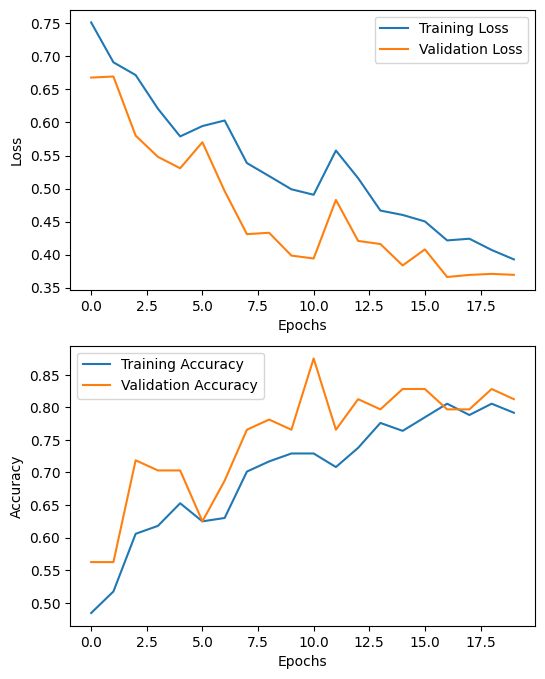

In [ ]:
# 학습 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 8))

plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 5. 성능 평가 및 수정

In [ ]:
# 모델 성능 평가
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


## 6. 직접 해보기(*.jpg 또는 jpeg)

Saving trash_002.jpg to trash_002.jpg
1/1 [==============================] - 0s 54ms/step


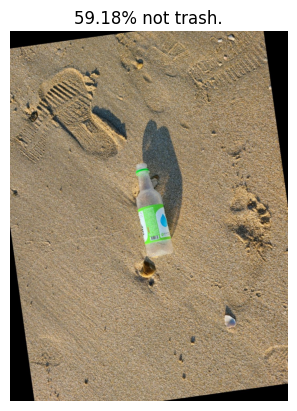

In [ ]:
from google.colab import files
#import os
from skimage import io
from skimage.transform import resize

# 이미지 불러오기 및 전처리
def load_and_preprocess_image(image_path):
    img = io.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = normalize_images([img])
    return img

# 예측 결과 출력
def display_prediction(image_path, model):
    image = load_and_preprocess_image(image_path)
    prediction = model.predict(image)

    plt.imshow(io.imread(image_path))
    plt.axis('off')

    if prediction >= 0.5:
        plt.title(f'{prediction[0][0] * 100:.2f}% not trash.')
    else:
        plt.title(f'{(1 - prediction[0][0]) * 100:.2f}% trash.')

# 이미지 업로드
uploaded = files.upload()
uploaded_image_path = list(uploaded.keys())[0]

# 예측 결과 확인
display_prediction(uploaded_image_path, model)
